In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math
import warnings

In [2]:
data = pd.read_csv(r"C:\Users\devad\Downloads\onlinefraud.csv.zip")
data

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1,0


In [3]:
data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [4]:
data.tail()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.0,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.0,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.0,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.0,C2080388513,0.00,0.00,1,0
6362619,743,CASH_OUT,850002.52,C1280323807,850002.52,0.0,C873221189,6510099.11,7360101.63,1,0


In [5]:
data.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [6]:
data.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [8]:
data.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

In [9]:
data.shape

(6362620, 11)

In [10]:
data['type'].value_counts()

type
CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: count, dtype: int64

In [11]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

data['type'] = le.fit_transform(data['type'])
data['nameOrig'] = le.fit_transform(data['nameOrig'])
data['nameDest'] = le.fit_transform(data['nameDest'])

In [12]:
data.head(5)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,3,9839.64,757869,170136.0,160296.36,1662094,0.0,0.0,0,0
1,1,3,1864.28,2188998,21249.0,19384.72,1733924,0.0,0.0,0,0
2,1,4,181.00,1002156,181.0,0.00,439685,0.0,0.0,1,0
3,1,1,181.00,5828262,181.0,0.00,391696,21182.0,0.0,1,0
4,1,3,11668.14,3445981,41554.0,29885.86,828919,0.0,0.0,0,0


In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            int64  
 2   amount          float64
 3   nameOrig        int64  
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        int64  
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(6)
memory usage: 534.0 MB


In [14]:
data[['amount','oldbalanceOrg','newbalanceOrig','oldbalanceDest','newbalanceDest']].astype(int)

,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest
0,9839,170136,160296,0,0
1,1864,21249,19384,0,0
2,181,181,0,0,0
3,181,181,0,21182,0
4,11668,41554,29885,0,0
...,...,...,...,...,...
6362615,339682,339682,0,0,339682
6362616,6311409,6311409,0,0,0
6362617,6311409,6311409,0,68488,6379898
6362618,850002,850002,0,0,0


In [15]:
from sklearn.preprocessing import StandardScaler


numeric_columns = ['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']

scaler = StandardScaler()

data[numeric_columns] = scaler.fit_transform(data[numeric_columns])

data[numeric_columns] = data[numeric_columns].astype(int)

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype
---  ------          -----
 0   step            int64
 1   type            int64
 2   amount          int64
 3   nameOrig        int64
 4   oldbalanceOrg   int64
 5   newbalanceOrig  int64
 6   nameDest        int64
 7   oldbalanceDest  int64
 8   newbalanceDest  int64
 9   isFraud         int64
 10  isFlaggedFraud  int64
dtypes: int64(11)
memory usage: 534.0 MB


In [17]:
x = data.drop(['isFraud'], axis = 1)
y = data['isFraud']

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)
print("x_train",x_train.shape)
print("x_test",x_test.shape)
print("y_train",y_train.shape)
print("y_test",y_test.shape)

x_train (5090096, 10)
x_test (1272524, 10)
y_train (5090096,)
y_test (1272524,)


In [18]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.fit(x_test)

In [19]:
x_train_scaled

array([[-6.00013793e-01, -5.28491089e-01, -8.37141600e-02, ...,
        -1.46036293e-01, -1.43201998e-01, -1.47005582e-03],
       [-6.60373596e-02, -5.28491089e-01, -8.37141600e-02, ...,
        -1.46036293e-01, -1.43201998e-01, -1.47005582e-03],
       [-1.61175862e+00,  1.69340993e+00,  3.14879078e+00, ...,
        -1.46036293e-01,  1.00017131e+00, -1.47005582e-03],
       ...,
       [-4.03285634e-01, -1.26912476e+00, -8.37141600e-02, ...,
        -1.46036293e-01, -1.43201998e-01, -1.47005582e-03],
       [-7.19455890e-01, -1.26912476e+00, -8.37141600e-02, ...,
        -1.46036293e-01, -1.43201998e-01, -1.47005582e-03],
       [ 5.73329160e-01, -1.26912476e+00, -8.37141600e-02, ...,
        -1.46036293e-01, -1.43201998e-01, -1.47005582e-03]])

In [20]:
x_test_scaled

StandardScaler()

In [21]:
data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,3,0,757869,0,0,1662094,0,0,0,0
1,1,3,0,2188998,0,0,1733924,0,0,0,0
2,1,4,0,1002156,0,0,439685,0,0,1,0
3,1,1,0,5828262,0,0,391696,0,0,1,0
4,1,3,0,3445981,0,0,828919,0,0,0,0


## 1. Linear Regression

In [22]:
x = data.drop(['isFraud'], axis = 1)
y = data['isFraud']

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)
print("x_train",x_train.shape)
print("x_test",x_test.shape)
print("y_train",y_train.shape)
print("y_test",y_test.shape)

x_train (5090096, 10)
x_test (1272524, 10)
y_train (5090096,)
y_test (1272524,)


In [23]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
model = lr.fit(x_train, y_train)
model

LinearRegression()

In [24]:
y_pred = model.predict(x_test)
y_pred

array([0.00103841, 0.00073279, 0.00186895, ..., 0.00102734, 0.00183218,
       0.00922948])

In [25]:
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error

mse = mean_squared_error(y_pred,y_test)
mae = mean_absolute_error(y_pred, y_test)
r2 = r2_score(y_pred, y_test)

print(f"Mean sqaured error :",mse)
print(f"Mean absolute error :",mae)
print(f"R sqaured error :",r2)

Mean sqaured error : 0.0012546192965063477
Mean absolute error : 0.0034016126849421777
R sqaured error : -38.12630026146946


## 2.Logistic Regression

In [26]:
x = data.drop(['isFlaggedFraud'], axis = 1)
y = data['isFlaggedFraud']

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
print("x_train",x_train.shape)
print("x_test",x_test.shape)
print("y_train",y_train.shape)
print("y_test",y_test.shape)

x_train (5090096, 10)
x_test (1272524, 10)
y_train (5090096,)
y_test (1272524,)


In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)


lr = LogisticRegression()
model = lr.fit(x_train_scaled, y_train)
model

LogisticRegression()

In [28]:
y_pred = model.predict(x_test_scaled)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [29]:
from sklearn.metrics import accuracy_score
aaa =  accuracy_score(y_test,y_pred)*100
print(f"The accuracy score :",aaa)

The accuracy score : 99.99976424806133


## 3. Decision Tree

In [30]:
x = data.drop(['isFlaggedFraud'], axis = 1)
y = data['isFlaggedFraud']

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
print("x_train",x_train.shape)
print("x_test",x_test.shape)
print("y_train",y_train.shape)
print("y_test",y_test.shape)

x_train (5090096, 10)
x_test (1272524, 10)
y_train (5090096,)
y_test (1272524,)


In [31]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier()

model = dtc.fit(x_train,y_train)

model

DecisionTreeClassifier()

In [32]:
DTree = DecisionTreeClassifier(criterion='gini',max_depth=3)
model = DTree.fit(x_train,y_train)
model

DecisionTreeClassifier(max_depth=3)

In [33]:
y_pred = DTree.predict(x_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [34]:
from sklearn.metrics import accuracy_score
aaa = accuracy_score(y_test,y_pred)*100
print("The accuracy score :",aaa)

The accuracy score : 99.99976424806133


In [35]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print("The confusion matrix :")
print(cm)

The confusion matrix :
[[1272521       0]
 [      3       0]]


In [36]:
from sklearn.metrics import classification_report
crr = classification_report(y_test, y_pred,zero_division=0)
print("The classification report :")
print(crr)

The classification report :
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1272521
           1       0.00      0.00      0.00         3

    accuracy                           1.00   1272524
   macro avg       0.50      0.50      0.50   1272524
weighted avg       1.00      1.00      1.00   1272524



[Text(0.4444444444444444, 0.875, 'x[0] <= 729.5\ngini = 0.0\nsamples = 5090096\nvalue = [5090083.0, 13.0]'),
 Text(0.2222222222222222, 0.625, 'x[9] <= 0.5\ngini = 0.0\nsamples = 5089949\nvalue = [5089939, 10]'),
 Text(0.3333333333333333, 0.75, 'True  '),
 Text(0.1111111111111111, 0.375, 'gini = 0.0\nsamples = 5083503\nvalue = [5083503, 0]'),
 Text(0.3333333333333333, 0.375, 'x[5] <= 0.5\ngini = 0.003\nsamples = 6446\nvalue = [6436, 10]'),
 Text(0.2222222222222222, 0.125, 'gini = 0.002\nsamples = 6377\nvalue = [6370, 7]'),
 Text(0.4444444444444444, 0.125, 'gini = 0.083\nsamples = 69\nvalue = [66, 3]'),
 Text(0.6666666666666666, 0.625, 'x[5] <= 0.5\ngini = 0.04\nsamples = 147\nvalue = [144.0, 3.0]'),
 Text(0.5555555555555556, 0.75, '  False'),
 Text(0.5555555555555556, 0.375, 'gini = 0.0\nsamples = 136\nvalue = [136, 0]'),
 Text(0.7777777777777778, 0.375, 'x[4] <= 6.5\ngini = 0.397\nsamples = 11\nvalue = [8, 3]'),
 Text(0.6666666666666666, 0.125, 'gini = 0.375\nsamples = 4\nvalue = [1, 3

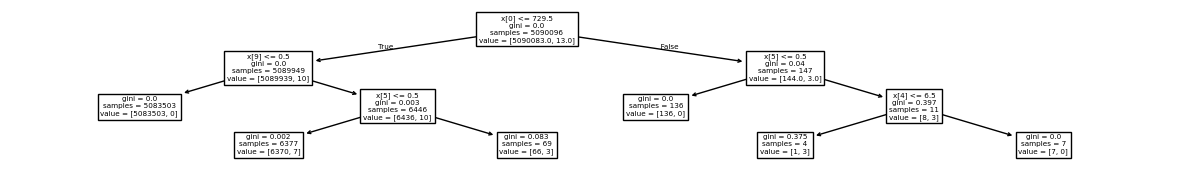

In [37]:
from sklearn import tree

plt.figure(figsize=(15,2))

tree.plot_tree(DTree.fit(x_train, y_train))

## 4.Random Forest

In [38]:
x = data.drop(['isFlaggedFraud'], axis = 1)
y = data['isFlaggedFraud']

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)
print("x_train",x_train.shape)
print("x_test",x_test.shape)
print("y_train",y_train.shape)
print("y_test",y_test.shape)

x_train (5090096, 10)
x_test (1272524, 10)
y_train (5090096,)
y_test (1272524,)


In [39]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()
model = rfc.fit(x_train, y_train)
model

RandomForestClassifier()

In [40]:
y_pred = model.predict(x_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [41]:
from sklearn.metrics import accuracy_score
acs = accuracy_score(y_pred, y_test)*100
print("The Accuracy score :",acs)

The Accuracy score : 99.99960708010222


In [42]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print("The confusion matrix :")
print(cm)

The confusion matrix :
[[1272519       0]
 [      5       0]]


In [43]:
from sklearn.metrics import classification_report
crr = classification_report(y_test, y_pred,zero_division=0)
print("The classification report :")
print(crr)

The classification report :
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1272519
           1       0.00      0.00      0.00         5

    accuracy                           1.00   1272524
   macro avg       0.50      0.50      0.50   1272524
weighted avg       1.00      1.00      1.00   1272524



## 5. AdaBoost

In [44]:
x = data.drop(['isFlaggedFraud'], axis = 1)
y = data['isFlaggedFraud']

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=0)
print("x_train",x_train.shape)
print("x_test",x_test.shape)
print("y_train",y_train.shape)
print("y_test",y_test.shape)

x_train (5726358, 10)
x_test (636262, 10)
y_train (5726358,)
y_test (636262,)


In [45]:
from sklearn.ensemble import AdaBoostClassifier

abc = AdaBoostClassifier(n_estimators=50,learning_rate=1.0)
model = abc.fit(x_train, y_train)
model

AdaBoostClassifier()

In [46]:
y_pred = model.predict(x_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [47]:
from sklearn.metrics import accuracy_score
acs = accuracy_score(y_test, y_pred)*100
print("The Accuracy score:",acs)

The Accuracy score: 100.0


In [48]:
from sklearn.metrics import classification_report
crr = classification_report(y_test, y_pred,zero_division=0)
print("The classification report :")
print(crr)

The classification report :
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    636262

    accuracy                           1.00    636262
   macro avg       1.00      1.00      1.00    636262
weighted avg       1.00      1.00      1.00    636262



## 6. XGBoost

In [70]:
!pip install xgboost


[notice] A new release of pip is available: 24.3.1 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [51]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier

params = {
    'objective': 'binary:logistic',  
    'max_depth': 4,
    'alpha': 10,
    'learning_rate': 0.1
}


xgb_clf = XGBClassifier(**params, n_estimators=100)


xgb_clf.fit(x_train, y_train)

y_pred = xgb_clf.predict(x_test)


In [52]:
print(xgb_clf)

XGBClassifier(alpha=10, base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, ...)


In [53]:
y_pred = xgb_clf.predict(x_test)

In [54]:
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [55]:
from sklearn.metrics import accuracy_score
aa = accuracy_score(y_test, y_pred)*100
print(f"The XGBoost Accuracy score is = {aa}")

The XGBoost Accuracy score is = 100.0


In [56]:
from sklearn.metrics import classification_report
crr = classification_report(y_test, y_pred,zero_division=0)
print("The classification report :")
print(crr)

The classification report :
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    636262

    accuracy                           1.00    636262
   macro avg       1.00      1.00      1.00    636262
weighted avg       1.00      1.00      1.00    636262



## 7. GradientBoosting

In [57]:
from sklearn.model_selection import train_test_split

x = data.drop(['isFlaggedFraud'], axis=1)
y = data['isFlaggedFraud']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

print("x_train:", x_train.shape)
print("x_test:", x_test.shape)
print("y_train:", y_train.shape)
print("y_test:", y_test.shape)

x_train: (5090096, 10)
x_test: (1272524, 10)
y_train: (5090096,)
y_test: (1272524,)


In [58]:
from sklearn.ensemble import GradientBoostingClassifier

gbc = GradientBoostingClassifier(learning_rate=0.3, n_estimators=100, max_depth=3, min_samples_split=2, min_samples_leaf=1, ccp_alpha = 10 )

model = gbc.fit(x_train, y_train)

model

GradientBoostingClassifier(ccp_alpha=10, learning_rate=0.3)

In [59]:
y_pred = model.predict(x_test)

In [60]:
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [61]:
from sklearn.metrics import accuracy_score
acs = accuracy_score(y_test, y_pred)*100
print("The Accuracy score:",acs)

The Accuracy score: 99.99976424806133


In [62]:
from sklearn.metrics import classification_report
crr = classification_report(y_test, y_pred,zero_division=0)
print("The classification report :")
print(crr)

The classification report :
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1272521
           1       0.00      0.00      0.00         3

    accuracy                           1.00   1272524
   macro avg       0.50      0.50      0.50   1272524
weighted avg       1.00      1.00      1.00   1272524



## 8. KNN

In [17]:
from sklearn.model_selection import train_test_split

x = data.drop(['isFlaggedFraud'], axis=1)
y = data['isFlaggedFraud']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

print("x_train:", x_train.shape)
print("x_test:", x_test.shape)
print("y_train:", y_train.shape)
print("y_test:", y_test.shape)

x_train: (5090096, 10)
x_test: (1272524, 10)
y_train: (5090096,)
y_test: (1272524,)


In [20]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=15,p=2,metric='euclidean')

knn

KNeighborsClassifier(metric='euclidean', n_neighbors=15)

In [21]:
model = knn.fit(x_train, y_train)
model

KNeighborsClassifier(metric='euclidean', n_neighbors=15)

In [22]:
y_pred = model.predict(x_test)

In [23]:
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [24]:
from sklearn.metrics import accuracy_score
acs = accuracy_score(y_test, y_pred)*100
print("The Accuracy score:",acs)

The Accuracy score: 99.99976424806133


In [25]:
from sklearn.metrics import classification_report
crr = classification_report(y_test, y_pred,zero_division=0)
print("The classification report :")
print(crr)

The classification report :
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1272521
           1       0.00      0.00      0.00         3

    accuracy                           1.00   1272524
   macro avg       0.50      0.50      0.50   1272524
weighted avg       1.00      1.00      1.00   1272524



## 9. Naive Bayes

In [32]:
from sklearn.model_selection import train_test_split

x = data.drop(['isFlaggedFraud'], axis=1)
y = data['isFlaggedFraud']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

print("x_train:", x_train.shape)
print("x_test:", x_test.shape)
print("y_train:", y_train.shape)
print("y_test:", y_test.shape)

x_train: (4453834, 10)
x_test: (1908786, 10)
y_train: (4453834,)
y_test: (1908786,)


In [33]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()

gnb.fit(x_train, y_train)

GaussianNB()

In [34]:
y_pred = gnb.predict(x_test)

In [35]:
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [36]:
from sklearn.metrics import accuracy_score
acs = accuracy_score(y_test, y_pred)*100
print("The Accuracy score:",acs)

The Accuracy score: 96.43731670286768


In [37]:
from sklearn.metrics import classification_report
crr = classification_report(y_test, y_pred,zero_division=0)
print("The classification report :")
print(crr)

The classification report :
              precision    recall  f1-score   support

           0       1.00      0.96      0.98   1908780
           1       0.00      1.00      0.00         6

    accuracy                           0.96   1908786
   macro avg       0.50      0.98      0.49   1908786
weighted avg       1.00      0.96      0.98   1908786



## 10. SVM

In [63]:
from sklearn.model_selection import train_test_split

x = data.drop(['isFlaggedFraud'], axis=1)
y = data['isFlaggedFraud']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

print("x_train:", x_train.shape)
print("x_test:", x_test.shape)
print("y_train:", y_train.shape)
print("y_test:", y_test.shape)

x_train: (5090096, 10)
x_test: (1272524, 10)
y_train: (5090096,)
y_test: (1272524,)


In [64]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [65]:
from sklearn.svm import SVC

model = SVC(kernel='linear',random_state=1)
model.fit(x_train, y_train)

SVC(kernel='linear', random_state=1)

In [66]:
y_pred = model.predict(x_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [67]:
from sklearn.metrics import accuracy_score
aa = accuracy_score(y_test, y_pred)*100
print("The SVM accuracy score :",aa)

The SVM accuracy score : 99.99992141602044


In [68]:
from sklearn.metrics import classification_report
crr = classification_report(y_test, y_pred,zero_division=0)
print("The classification report :")
print(crr)

The classification report :
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1272521
           1       1.00      0.67      0.80         3

    accuracy                           1.00   1272524
   macro avg       1.00      0.83      0.90   1272524
weighted avg       1.00      1.00      1.00   1272524

